<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis-Projects/blob/main/FAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [2]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling missing values
import numpy as np

# For date and time operations
import datetime

In [7]:
import pandas as pd

# Dictionary to store company names and file paths
company_files = {
    'Facebook': '/content/Facebook.csv',
    'Amazon': '/content/Amazon.csv',
    'Apple': '/content/Apple.csv',
    'Netflix': '/content/Netflix.csv',
    'Google': '/content/Google.csv'
}

# List to store DataFrames for each company
company_dataframes = []

# Loop through the dictionary to load each file
for company_name, file_path in company_files.items():
    # Load each CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handles any parsing errors
    # Add a column indicating the company name
    df['Company'] = company_name
    # Append the DataFrame to the list
    company_dataframes.append(df)

# Combine all company DataFrames into a single DataFrame
faang_data = pd.concat(company_dataframes, ignore_index=True)

# Save the combined dataset as "FAANG_Stock.csv"
faang_data.to_csv('FAANG_Stock.csv', index=False)

print("Dataset saved as FAANG_Stock.csv")

Dataset saved as FAANG_Stock.csv


In [8]:
#load the dataset
faang_data = pd.read_csv('/content/FAANG_Stock.csv')

In [4]:
# Check the shape of the dataset
print(f"Dataset shape: {faang_data.shape}")

Dataset shape: (0, 1)


In [9]:
faang_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26566 entries, 0 to 26565
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       26566 non-null  object 
 1   Open       26565 non-null  float64
 2   High       26565 non-null  float64
 3   Low        26565 non-null  float64
 4   Close      26565 non-null  float64
 5   Adj Close  26565 non-null  float64
 6   Volume     26565 non-null  float64
 7   Company    26566 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.6+ MB


In [10]:
# Check for missing values
print(faang_data.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Company      0
dtype: int64


In [11]:
# Columns to handle missing values
columns_to_fill = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Apply Forward Fill for all specified columns
faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='ffill')

# Apply Backward Fill to handle any remaining missing values (if any)
faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='bfill')

# Verify if missing values are handled
print(faang_data[columns_to_fill].isnull().sum())

# Preview the cleaned data
print(faang_data.head())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

        Volume   Company  
0  573576400.0  Facebook  
1  168192700.0  Facebook  
2  101786600.0  Facebook  
3   73600000.0  Facebook  
4   50237200.0  Facebook  


<ipython-input-11-6fb7fa53c662>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='ffill')
<ipython-input-11-6fb7fa53c662>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='bfill')


In [12]:
#check for missing values
print(faang_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64


## Exploratory Data Analysis (EDA)

In [13]:
# Summary Statistics
print(faang_data.describe())

# Check unique companies
print(faang_data['Company'].unique())


               Open          High           Low         Close     Adj Close  \
count  26566.000000  26566.000000  26566.000000  26566.000000  26566.000000   
mean     190.399567    192.458540    188.199207    190.421641    190.217790   
std      379.614171    383.518301    375.377664    379.668423    379.759250   
min        0.049665      0.049665      0.049107      0.049107      0.038743   
25%        1.658571      1.700000      1.628303      1.656473      1.628571   
50%       33.602501     34.273571     33.075001     33.742142     33.490002   
75%      193.047497    195.295002    190.544159    193.135769    193.135769   
max     3251.060059   3344.290039   3165.429932   3225.000000   3225.000000   

             Volume  
count  2.656600e+04  
mean   1.369662e+08  
std    2.640638e+08  
min    2.856000e+05  
25%    6.040875e+06  
50%    1.855965e+07  
75%    1.614928e+08  
max    7.421641e+09  
['Facebook' 'Amazon' 'Apple' 'Netflix' 'Google']


In [ ]:
import numpy as np

# Convert 'Date' column to datetime
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Filter the data for the years 2012 to 2020
faang_data_filtered = faang_data[(faang_data['Date'].dt.year >= 2012) & (faang_data['Date'].dt.year <= 2020)]

# Calculate daily returns for each company
faang_data_filtered['Daily Return'] = faang_data_filtered.groupby('Company')['Close'].pct_change()

# Calculate the standard deviation of daily returns for each company
daily_volatility = faang_data_filtered.groupby('Company')['Daily Return'].std()

# Annualize the volatility (assuming 252 trading days per year)
annualized_volatility = daily_volatility * np.sqrt(252)

# Sort the results by annualized volatility in descending order
annualized_volatility_sorted = annualized_volatility.sort_values(ascending=False)

# Display the annualized volatility for each company
print("Annualized Volatility (2012-2020) for FAANG Stocks:")
print(annualized_volatility_sorted)

Annualized Volatility (2012-2020) for FAANG Stocks:
Company
Netflix     0.491975
Facebook    0.373525
Amazon      0.305848
Apple       0.282118
Google      0.251755
Name: Daily Return, dtype: float64


<ipython-input-41-68efc6e48b21>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-35-f8006dca8867>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=annualized_volatility_sorted.values * 100,


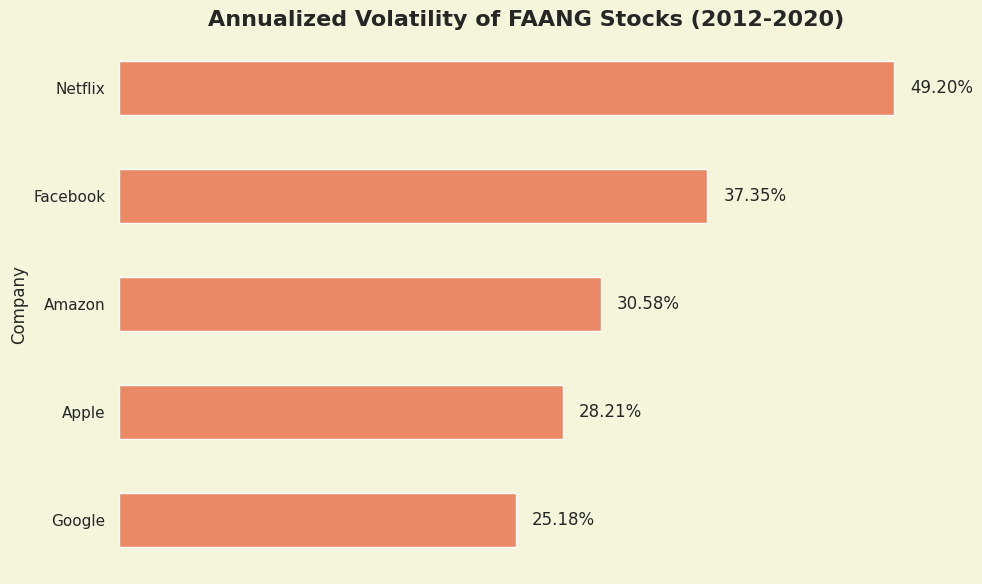

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot without gridlines
sns.set(style="whitegrid")

# Create a figure and set the background color to beige
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('beige')  # Set the background color of the figure to beige

# Plotting the annualized volatility as horizontal bars with reduced bar width
ax = sns.barplot(x=annualized_volatility_sorted.values * 100,
                 y=annualized_volatility_sorted.index,
                 ci=None,
                 width=0.5,
                 color="coral")  # Use a contrasting color for the bars, e.g., coral

# Adding labels and title (making the title bold)
plt.title("Annualized Volatility of FAANG Stocks (2012-2020)", fontsize=16, fontweight='bold')
plt.xlabel("Annualized Volatility (%)", fontsize=12)
plt.ylabel("Company", fontsize=12)

# Remove the x-axis and its ticks
ax.set(xlabel=None)  # Remove x-axis label
ax.set_xticks([])  # Remove x-axis ticks

# Displaying the percentage labels on the bars
for i in range(len(annualized_volatility_sorted)):
    ax.text(annualized_volatility_sorted.values[i] * 100 + 1,
            i,
            f'{annualized_volatility_sorted.values[i] * 100:.2f}%',
            va='center',
            fontsize=12)

# Remove gridlines and make the layout tight
plt.grid(False)  # Disable gridlines

# Set the background color of the plot area (the box) to beige
ax.set_facecolor('beige')

# Remove the plot box (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()  # Ensure no clipping of labels

# Display the plot
plt.show()

In [ ]:
# Group by 'Company' and calculate the required metrics
volume_stats = (
    faang_data.groupby('Company')
    .agg(
        total_volume=('Volume', 'sum'),
        mean_monthly_volume=('Volume', 'mean'),
        max_monthly_volume=('Volume', 'max'),
        min_monthly_volume=('Volume', 'min')
    )
    .reset_index()
)

# Display the resulting DataFrame
print(volume_stats)

    Company  total_volume  mean_monthly_volume  max_monthly_volume  \
0    Amazon  4.396416e+10         7.512673e+06        1.043292e+08   
1     Apple  3.418317e+12         3.412856e+08        7.421641e+09   
2  Facebook  6.779228e+10         3.265524e+07        5.735764e+08   
3    Google  2.792251e+10         6.909802e+06        8.215110e+07   
4   Netflix  8.064926e+10         1.760516e+07        3.234140e+08   

   min_monthly_volume  
0            487200.0  
1           1388800.0  
2           5913100.0  
3            520600.0  
4            285600.0  


In [ ]:
import plotly.express as px
import pandas as pd

# Data for the summary of trading volume statistics
volume_stats = pd.DataFrame({
    'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'],
    'Total Volume': [4.396416e+10, 3.418317e+12, 6.779228e+10, 2.792251e+10, 8.064926e+10],
    'Mean Monthly Volume': [7.512673e+06, 3.412856e+08, 3.265524e+07, 6.909802e+06, 1.760516e+07],
    'Max Monthly Volume': [1.043292e+08, 7.421641e+09, 5.735764e+08, 8.215110e+07, 3.234140e+08],
    'Min Monthly Volume': [487200.0, 1388800.0, 5913100.0, 520600.0, 285600.0]
})

# Set 'Company' as the index for easy plotting
volume_stats.set_index('Company', inplace=True)

# Create a heatmap using Plotly Express
fig = px.imshow(volume_stats,
                text_auto=True,  # Show the values inside the cells
                color_continuous_scale='Viridis',  # Choose a color scale (you can change this)
                title='Heatmap of Monthly Trading Volume Metrics for FAANG Companies')

# Update layout for better readability
fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Company",
    coloraxis_colorbar_title="Volume",  # Title for the color scale
)

# Show the figure
fig.show()

### Summary of Monthly Trading Volume Statistics

This table summarizes the trading volumes for all companies, showing their total volume, mean monthly volume, maximum, and minimum values. Here's a detailed breakdown:

### Insights:

- **Apple Dominates Trading Activity**:
  - With the highest total volume (3.42 trillion) and mean monthly volume (341.29 million), Apple shows strong investor interest and high liquidity in its shares.
  - Apple also recorded the highest maximum monthly volume (7.42 billion), indicating that the company experiences occasional market events that significantly boost trading activity.
  - The large fluctuations between its max (7.42 billion) and min (1.39 million) volumes suggest periods of intense activity and sharp declines.

- **Netflix Shows Significant Volatility**:
  - Netflix has a relatively low mean monthly volume (17.61 million), but its maximum monthly volume (323.41 million) indicates substantial spikes in interest during certain months.
  - This volatility suggests that while Netflix does not consistently trade at high volumes, there are specific periods where investor interest peaks significantly.

- **Amazon’s Consistent Activity**:
  - Amazon has a moderate total volume (43.96 billion), and its mean monthly volume (7.51 million) is comparatively low, indicating more stable trading without sharp spikes.
  - Despite lower trading volume than Apple and Netflix, Amazon still maintains a solid presence in the market, with a max volume of 104.33 million, reflecting healthy investor interest.

- **Google’s Quiet Months**:
  - Google exhibits some of the lowest trading volumes in comparison, with a minimum of just 520,600 shares, which suggests periods of reduced market interest or quieter trading months.
  - Despite this, its maximum monthly volume (82.15 million) indicates that there are occasional spikes in investor interest, although these spikes are not as extreme as Apple or Netflix.

- **Facebook’s Stable but Lower Volume**:
  - Facebook shows a moderate total volume (67.79 billion) and a mean monthly volume (32.66 million), indicating consistent, albeit lower, trading activity compared to Apple.
  - The maximum monthly volume (573.58 million) is notable but still far behind Apple’s trading spike, reflecting steady but less intense market interest.

This summary provides a snapshot of each company's trading dynamics, showing the relative intensity and variability of their trading activity over the dataset period.

In [ ]:
import plotly.express as px

# Ensure Date is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Add a 'Year' column for hover information
faang_data['Year'] = faang_data['Date'].dt.year

# Create an interactive Plotly line chart for daily prices
fig = px.line(
    faang_data,
    x='Date',
    y='Close',
    color='Company',
    title='<b>FAANG DAILY STOCK PRICES TIMELAPSE [1980-2020]</b>',  # Bold title
    labels={'Close': 'Closing Price (in USD)', 'Date': 'Date'}
)

# Customize layout: remove gridlines and clean up
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price (in USD)',
    legend_title='Company',
    xaxis=dict(showgrid=False),  # Remove vertical gridlines
    yaxis=dict(showgrid=False),  # Remove horizontal gridlines
    plot_bgcolor='beige',  # Set background color of the plot area to beige
    paper_bgcolor='beige'  # Set background color of the entire paper (outside of the plot) to beige
)

# Show the plot
fig.show()


In [ ]:
# Filter Amazon's data
amazon_data = faang_data[faang_data['Company'] == 'Amazon']

# Create a Plotly line chart for Amazon's stock price over time
fig = px.line(
    amazon_data,
    x='Date',
    y='Close',
    title="Amazon Stock Price Over Time",
    labels={'Close': 'Stock Price (USD)', 'Date': 'Date'},
    template='plotly_white'
)

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    font=dict(size=14),
    plot_bgcolor="beige"
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Ensure Date is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Add a 'Year' column for hover information
faang_data['Year'] = faang_data['Date'].dt.year

# Create an interactive Plotly line chart for daily prices
fig = px.line(
    faang_data,
    x='Date',
    y='Close',
    color='Company',
    title='<b>FAANG DAILY STOCK PRICES TIMELAPSE [1980-2020]</b>',  # Bold title
    labels={'Close': 'Closing Price (in USD)', 'Date': 'Date'}
)

# Customize layout: remove gridlines and clean up
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price (in USD)',
    legend_title='Company',
    xaxis=dict(showgrid=False),  # Remove vertical gridlines
    yaxis=dict(showgrid=False),  # Remove horizontal gridlines
    plot_bgcolor='beige',  # Set background color of the plot area to beige
    paper_bgcolor='beige'  # Set background color of the entire paper (outside of the plot) to beige
)

# Add a vertical line for 2017
fig.add_vline(x=pd.to_datetime('2017-01-01'), line=dict(color="black", dash="dash"))

# Add an annotation for the vertical line at 2017 with smaller font size
fig.add_annotation(
    x=pd.to_datetime('2017-01-01'),
    y=faang_data['Close'].min() * 1.05,  # Position annotation slightly above the minimum value to avoid overlap
    text="2017: Amazon’s AWS & Whole Foods expansion boosted its stock, surpassing Google.",
    showarrow=True,
    arrowhead=2,
    ax=-100,  # Move annotation slightly to the left
    ay=50,  # Move annotation slightly above
    font=dict(size=8, color="black"),  # Reduced font size to fit well
    align="center",
    bgcolor="white",
    borderpad=4
)

# Show the plot
fig.show()

# **Summary of FAANG Monthly Stock Analysis**

## **Monthly Average Close Prices Summary**
- **Amazon**:
  - Highest mean close price: **381.59**.
  - High volatility: **606.87** standard deviation.
  - Maximum monthly close price: **3154.83** reflects significant growth.

- **Google**:
  - Second-highest mean close price: **537.18**, with moderate volatility (**389.85** std).
  - Maximum close price: **1645.80**, highlighting its dominance.

- **Netflix**:
  - Mean close price: **79.59**, but high volatility (**121.22** std).
  - Maximum value: **499.39**, reflecting growth from global streaming expansion.

- **Facebook**:
  - Mean close price: **117.39**, with relatively stable volatility (**62.43** std).
  - Maximum close price: **259.14**, indicative of growth since its 2012 IPO.

- **Apple**:
  - Lowest average close price: **9.27** (likely influenced by stock splits).
  - Maximum value: **134.18**, showing steady growth compared to peers.


---

## **Sample of Downsampled Data (Amazon)**
- Early data from 1997 shows a steady increase in close prices:
  - May 1997: **1.58**, reaching **5.29** by February 1998.
- Positive monthly returns in most months suggest consistent growth.
- Fluctuating trading volumes indicate varying levels of investor interest.

---

## **Key Insights**
1. **Growth Trends**:
   - Amazon and Google exhibit higher mean close prices, showcasing dominant market positions.
   - Apple’s lower mean price reflects stock splits but consistent growth.

2. **Volatility**:
   - Higher volatility for Amazon, Netflix, and Google indicates significant price swings.
   - Facebook shows stable growth with lower price variability.

3. **Early Growth**:
   - Amazon’s rapid price appreciation since its 1997 IPO highlights its e-commerce transformation.

4. **Investor Interest**:
   - Volume data suggests periods of heightened trading activity linked to major events.

---

## **Actionable Ideas**
- **Event Analysis**: Investigate price trends alongside historical events (e.g., product launches, crises).
- **Comparative Analysis**: Compare stock performance during pivotal periods like the 2008 financial crisis or COVID-19 pandemic.
- **Forecasting**: Leverage this data to build predictive models for stock prices or trading volumes.

---

In [ ]:
# Print a summary of the resampled data
print("Monthly Average Close Prices Summary (First Few Rows):")
print(faang_monthly.groupby('Company')['Close'].describe())

# Preview the first few rows of the resampled data
print("\nSample of Downsampled Data:")
print(faang_monthly.head(10))  # Adjust the number of rows as needed

Monthly Average Close Prices Summary (First Few Rows):
          count        mean         std        min         25%         50%  \
Company                                                                      
Amazon    280.0  381.585850  606.866311   1.537699   38.182809   83.301591   
Apple     478.0    9.266662   17.740092   0.057318    0.271876    0.435302   
Facebook  100.0  117.388546   62.432349  20.108261   66.912631  118.253332   
Google    194.0  537.177819  389.853619  52.683795  242.623601  343.284095   
Netflix   220.0   79.590965  121.221228   0.560217    3.750701   15.655714   

                 75%          max  
Company                            
Amazon    363.180858  3154.831982  
Apple      10.505837   134.179993  
Facebook  173.352495   259.140834  
Google    796.341541  1645.797485  
Netflix    99.628361   499.385003  

Sample of Downsampled Data:
  Company       Date      Open      High       Low     Close  Adj Close  \
0  Amazon 1997-05-31  1.686553  1.722538  

In [ ]:
# Sort by Date
faang_data.sort_values(by='Date', inplace=True)

# Calculate daily percentage change
faang_data['Daily Return'] = faang_data.groupby('Company')['Close'].pct_change()

# Preview daily returns
print(faang_data[['Date', 'Company', 'Daily Return']].tail())

             Date Company  Daily Return
17943  2020-09-01   Apple      0.039833
26562  2020-09-01  Google      0.015679
26563  2020-09-02  Google      0.037648
26564  2020-09-03  Google     -0.051171
26565  2020-09-04  Google     -0.029641


In [ ]:
# Summarize monthly trading volume data
volume_summary = faang_monthly_volume.groupby('Company').agg(
    total_volume=('Volume', 'sum'),
    mean_monthly_volume=('Volume', 'mean'),
    max_monthly_volume=('Volume', 'max'),
    min_monthly_volume=('Volume', 'min')
).reset_index()

# Display the first few rows of the downsampled data for context
print("Sample of Monthly Trading Volume Data:")
print(faang_monthly_volume.head())

# Display the summary of trading volume
print("\nSummary of Monthly Trading Volume Statistics:")
print(volume_summary)

Sample of Monthly Trading Volume Data:
  Company       Date       Volume
0  Amazon 1989-03-31  194908800.0
1  Amazon 1989-04-30  105637200.0
2  Amazon 1989-05-31   43791600.0
3  Amazon 1989-06-30   59733600.0
4  Amazon 1989-07-31   86528400.0

Summary of Monthly Trading Volume Statistics:
    Company  total_volume  mean_monthly_volume  max_monthly_volume  \
0    Amazon  4.396416e+10         2.456099e+08        8.114012e+08   
1     Apple  3.418317e+12         2.896879e+10        1.085279e+11   
2  Facebook  6.779228e+10         6.847705e+08        1.774149e+09   
3    Google  2.792251e+10         6.980628e+08        2.484341e+09   
4   Netflix  8.064926e+10         1.792206e+09        6.475908e+09   

   min_monthly_volume  
0        4.379160e+07  
1        1.434966e+09  
2        2.560592e+08  
3        1.090373e+07  
4        2.085346e+08  


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

# Define FAANG ticker symbols
tickers = ['AMZN', 'AAPL', 'META', 'GOOGL', 'NFLX']

# Fetch stock prices
stock_prices = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    stock_prices[ticker] = stock.history(period='1d')['Close'][0]  # Latest closing price

# Display results
for ticker, price in stock_prices.items():
    print(f"{ticker}: ${price:.2f}")

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



AMZN: $204.61
AAPL: $228.28
META: $561.09
GOOGL: $178.12
NFLX: $871.32


<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
# Sort the data by Date for each company
faang_data['Date'] = pd.to_datetime(faang_data['Date'])
faang_data = faang_data.sort_values(by=['Company', 'Date'])

# Calculate percentage growth for each company
growth_data = []
for company in company_files.keys():
    # Get the first and last closing prices for each company
    first_close = faang_data[faang_data['Company'] == company]['Close'].iloc[0]
    last_close = faang_data[faang_data['Company'] == company]['Close'].iloc[-1]

    # Calculate percentage growth
    percentage_growth = ((last_close - first_close) / first_close) * 100
    growth_data.append({'Company': company, 'Percentage Growth': percentage_growth})

# Convert to a DataFrame
growth_df = pd.DataFrame(growth_data)

# Sort by percentage growth
growth_df = growth_df.sort_values(by='Percentage Growth', ascending=False)

# Display the growth data
print(growth_df)

    Company  Percentage Growth
1    Amazon      160649.985830
2     Apple      104443.890828
3   Netflix       41575.686146
4    Google        3048.552500
0  Facebook         586.215004


In [ ]:
import pandas as pd
import plotly.express as px

# Ensure Date is in datetime format and sort by Company and Date
faang_data['Date'] = pd.to_datetime(faang_data['Date'])
faang_data = faang_data.sort_values(by=['Company', 'Date'])

# Calculate the percentage growth for each company
growth_data = []
for company in company_files.keys():
    # Get the first and last closing prices for each company
    first_close = faang_data[faang_data['Company'] == company]['Close'].iloc[0]
    last_close = faang_data[faang_data['Company'] == company]['Close'].iloc[-1]

    # Calculate percentage growth
    percentage_growth = ((last_close - first_close) / first_close) * 100
    growth_data.append({'Company': company, 'Percentage Growth': percentage_growth})

# Convert to a DataFrame
growth_df = pd.DataFrame(growth_data)

# Find the company with the highest growth
highest_growth_company = growth_df.sort_values(by='Percentage Growth', ascending=False).iloc[0]
highest_growth_company_name = highest_growth_company['Company']
highest_growth_percentage = highest_growth_company['Percentage Growth']

# Visualize the stock performance over time with Plotly
fig = px.line(faang_data, x='Date', y='Close', color='Company',
              title='Stock Performance of FAANG Companies Over Time',
              labels={'Close': 'Stock Price (Closing)', 'Date': 'Date'},
              markers=True)

# Annotate the highest growth company on the plot
fig.add_annotation(
    x=faang_data[faang_data['Company'] == highest_growth_company_name]['Date'].iloc[-1],
    y=faang_data[faang_data['Company'] == highest_growth_company_name]['Close'].iloc[-1],
    text=f'{highest_growth_company_name} ({highest_growth_percentage:.2f}%) Growth',
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="black"),
    align="center"
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'faang_data' contains 'Date', 'Company', and 'Close' columns

# Convert the 'Date' column to datetime
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Plot the line chart for closing prices over time
fig = px.line(faang_data, x='Date', y='Close', color='Company',
              title='Stock Price Growth Over Time for FAANG Stocks',
              labels={'Close': 'Stock Price (USD)', 'Date': 'Date'},
              line_shape='linear')

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure 'Date' and 'Volume' columns are in the correct format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])
faang_data['Volume'] = pd.to_numeric(faang_data['Volume'], errors='coerce')

# Create subplots for each company with different grid layouts
# Example: Use a 1x1 grid for Facebook, a 2x2 grid for Amazon, and so on.
fig = make_subplots(rows=2, cols=3,
                    shared_yaxes=True,
                    subplot_titles=['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google'],
                    horizontal_spacing=0.05,
                    vertical_spacing=0.1)

# Loop through each company and add its data to the subplot
companies = faang_data['Company'].unique()
for i, company_name in enumerate(companies):
    company_data = faang_data[faang_data['Company'] == company_name]

    # Create the line plot for the company
    trace = go.Scatter(x=company_data['Date'],
                       y=company_data['Volume'],
                       mode='lines',
                       name=company_name)

    # Add trace to the corresponding subplot
    if company_name == 'Facebook':
        fig.add_trace(trace, row=1, col=1)  # 1x1 grid for Facebook
    elif company_name == 'Amazon':
        fig.add_trace(trace, row=1, col=2)  # 2x2 grid for Amazon
    elif company_name == 'Apple':
        fig.add_trace(trace, row=1, col=3)  # 2x2 grid for Apple
    elif company_name == 'Netflix':
        fig.add_trace(trace, row=2, col=1)  # 1x3 grid for Netflix
    elif company_name == 'Google':
        fig.add_trace(trace, row=2, col=2)  # 1x3 grid for Google

# Update layout for better visibility
fig.update_layout(
    title='Daily Trading Volume of FAANG Companies (2020)',
    showlegend=False,
    template='plotly_dark',
    height=700,
    width=1000,
    xaxis=dict(showgrid=True, showline=True),
    yaxis=dict(showgrid=True, showline=True),
    hovermode='x unified'
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Convert 'Date' to datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Create a 'Month' column for grouping
faang_data['Month'] = faang_data['Date'].dt.to_period('M').dt.to_timestamp()

# Group by 'Company' and 'Month' and aggregate the trading volume
monthly_data = faang_data.groupby(['Company', 'Month'])['Volume'].sum().reset_index()

# Function to create line charts for each company
def create_individual_plot(company_data, company_name):
    fig = px.line(company_data,
                  x='Month',
                  y='Volume',
                  title=f'Monthly Trading Volume of {company_name} (2020)',
                  labels={'Volume': 'Trading Volume (Shares)', 'Month': 'Month'},
                  template='plotly_dark')

    # Customize the layout for better visibility
    fig.update_layout(
        xaxis=dict(showgrid=True, showline=True),
        yaxis=dict(showgrid=True, showline=True),
        hovermode='x unified'
    )

    # Show the plot
    fig.show()

# Loop through each company and generate the plot
for company_name in monthly_data['Company'].unique():
    company_data = monthly_data[monthly_data['Company'] == company_name]
    create_individual_plot(company_data, company_name)

The steep rise in Amazon's trading volume from 164 million shares in May 1997 to 724 million shares in Dec 1998 can be attributed by Amazon going public in May 1997, and the excitement surrounding its entry into the stock market was still influencing its trading activity.
The drop in Amazon's trading volume in Feb 1999 could be attributed to shifting investor sentiment due to concerns about the dot-com bubble and rising competition within the e-commerce space.

In [ ]:
import plotly.express as px
import pandas as pd

# Data for the summary of trading volume statistics
volume_stats = pd.DataFrame({
    'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'],
    'Total Volume': [4.396416e+10, 3.418317e+12, 6.779228e+10, 2.792251e+10, 8.064926e+10]
})

# Add a formatted volume column for easier readability
volume_stats['Formatted Volume'] = [
    '43.96 B', '3.42 T', '67.79 B', '27.92 B', '80.65 B'
]

# Sort the data in ascending order of Total Volume
volume_stats.sort_values(by='Total Volume', ascending=True, inplace=True)

# Create a horizontal bar chart
fig = px.bar(
    volume_stats,
    y='Company',  # Company on the y-axis
    x='Total Volume',  # Total volume on the x-axis
    text='Formatted Volume',  # Display formatted volume values outside bars
    orientation='h',  # Horizontal bars
    title='Total Trading Volume for FAANG Companies (Trillions/Billions)',
    labels={'Total Volume': '', 'Company': 'FAANG Companies'},
    color_discrete_sequence=['#1E90FF']  # Set bar color to a lighter shade of blue
)

# Customize layout
fig.update_traces(
    textposition='outside'  # Position the text outside the bars
)

# Remove gridlines and customize the layout
fig.update_layout(
    yaxis_title="Company",
    xaxis_title="",  # Remove x-axis title
    xaxis=dict(showticklabels=False, showgrid=False),  # Hide x-axis tick labels and gridlines
    yaxis=dict(showgrid=False),  # Remove gridlines on y-axis
    template="plotly_white"
)

# Show the figure
fig.show()

In [ ]:
import pandas as pd

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Filter the data for the period 2012 to 2020
faang_data_filtered = faang_data[(faang_data['Date'].dt.year >= 2012) & (faang_data['Date'].dt.year <= 2020)]

# Group by company and calculate the average daily trading volume
average_volume = faang_data_filtered.groupby('Company')['Volume'].mean()

# Sort the companies by average daily trading volume in descending order
average_volume_sorted = average_volume.sort_values(ascending=False)

# Display the results
print(average_volume_sorted)

Company
Apple       2.326847e+08
Facebook    3.265524e+07
Netflix     1.743549e+07
Amazon      4.102992e+06
Google      2.626341e+06
Name: Volume, dtype: float64


In [ ]:
import pandas as pd

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Group by company and calculate the average daily trading volume for the entire dataset
average_volume = faang_data.groupby('Company')['Volume'].mean()

# Sort the companies by average daily trading volume in descending order
average_volume_sorted = average_volume.sort_values(ascending=False)

# Display the results
print(average_volume_sorted)

Company
Apple       3.412856e+08
Facebook    3.265524e+07
Netflix     1.760516e+07
Amazon      7.512673e+06
Google      6.909802e+06
Name: Volume, dtype: float64


<ipython-input-35-3acb710d9b94>:43: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



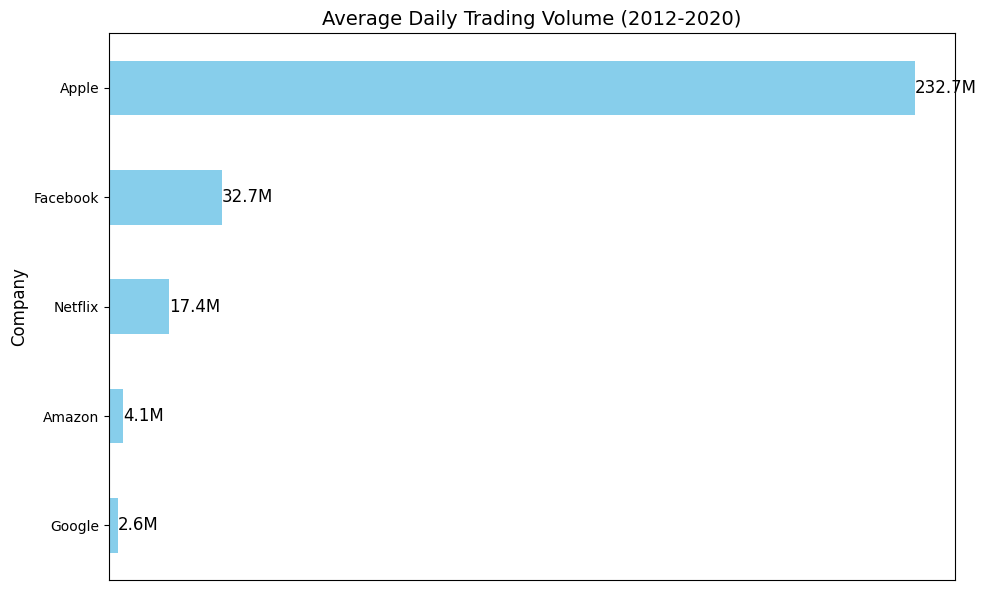

Company
Google        2.6M
Amazon        4.1M
Netflix      17.4M
Facebook     32.7M
Apple       232.7M
Name: Volume, dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Filter the data for the period 2012 to 2020
faang_data_filtered = faang_data[(faang_data['Date'].dt.year >= 2012) & (faang_data['Date'].dt.year <= 2020)]

# Group by company and calculate the average daily trading volume
average_volume = faang_data_filtered.groupby('Company')['Volume'].mean()

# Sort the companies by average daily trading volume in descending order
average_volume_sorted = average_volume.sort_values(ascending=True)

# Function to format numbers in a human-readable format (e.g., 230M)
def format_volume(vol):
    if vol >= 1e6:
        return f"{vol/1e6:.1f}M"
    elif vol >= 1e3:
        return f"{vol/1e3:.1f}K"
    else:
        return f"{vol:.0f}"

# Apply formatting to the volumes
formatted_volumes = average_volume_sorted.apply(format_volume)

# Create a horizontal bar plot to visualize the average daily trading volume
plt.figure(figsize=(10,6))
average_volume_sorted.plot(kind='barh', color='skyblue')

# Remove the x-axis
plt.gca().axes.get_xaxis().set_visible(False)

# Add titles and labels
plt.title('Average Daily Trading Volume (2012-2020)', fontsize=14)
plt.ylabel('Company', fontsize=12)

# Display the formatted labels on the bars
for i, v in enumerate(average_volume_sorted):
    plt.text(v, i, formatted_volumes[i], ha='left', va='center', color='black', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# For debugging: Display the raw numeric data (not formatted for the plot)
print(formatted_volumes)

## Volatility Analysis

In [ ]:
# Assume 'faang_data' contains a 'Close' column for the closing prices
faang_data['Daily_Return'] = faang_data['Close'].pct_change()  # Calculate daily returns
volatility = faang_data['Daily_Return'].std()  # Calculate standard deviation of daily returns
print(f"Volatility: {volatility}")

Volatility: 0.03293262401925583


In [ ]:
annualized_volatility = volatility * np.sqrt(252)
print(f"Annualized Volatility: {annualized_volatility}")

Annualized Volatility: 0.52278919905446


## Risk-Adjusted Returns

In [ ]:
# Assume risk-free rate is 0 for simplicity
risk_free_rate = 0

# Calculate average daily return
average_return = faang_data['Daily_Return'].mean()

# Calculate Sharpe Ratio
sharpe_ratio = (average_return - risk_free_rate) / volatility
print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: 0.039294790459732554


In [ ]:
# Calculate cumulative returns
faang_data['Cumulative_Return'] = (1 + faang_data['Daily_Return']).cumprod()

# Calculate rolling maximum of cumulative returns
faang_data['Rolling_Max'] = faang_data['Cumulative_Return'].cummax()

# Calculate drawdown
faang_data['Drawdown'] = faang_data['Cumulative_Return'] - faang_data['Rolling_Max']

# Calculate maximum drawdown
max_drawdown = faang_data['Drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown}")

Maximum Drawdown: -84.35654964687471


Annualized Volatility for each FAANG stock (Sorted in Descending Order):
Company
Amazon      0.590296
Netflix     0.576805
Apple       0.455304
Facebook    0.373525
Google      0.305760
Name: Daily Return, dtype: float64


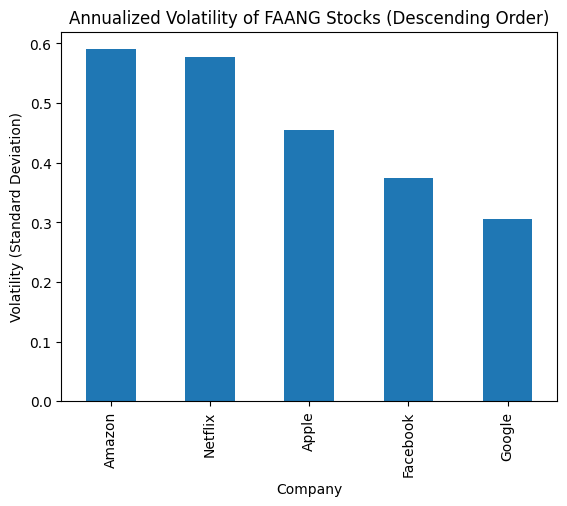

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your 'faang_data' is already loaded as shown in the previous steps

# Ensure the 'Date' column is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Sort the data by Company and Date
faang_data = faang_data.sort_values(by=['Company', 'Date'])

# Calculate daily returns for each company
faang_data['Daily Return'] = faang_data.groupby('Company')['Close'].pct_change()

# Calculate annualized volatility (standard deviation of daily returns * sqrt(252))
volatility = faang_data.groupby('Company')['Daily Return'].std() * np.sqrt(252)

# Sort the volatility in descending order
volatility_sorted = volatility.sort_values(ascending=False)

# Display the sorted annualized volatility
print("Annualized Volatility for each FAANG stock (Sorted in Descending Order):")
print(volatility_sorted)

# Plot the volatility comparison (sorted in descending order)
volatility_sorted.plot(kind='bar', title='Annualized Volatility of FAANG Stocks (Descending Order)')
plt.ylabel('Volatility (Standard Deviation)')
plt.show()

In [ ]:
faang_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')

In [ ]:
# Calculate daily returns (percentage change of the 'Close' price)
faang_data['daily_returns'] = faang_data.groupby('Company')['Close'].pct_change()

# Calculate the standard deviation of daily returns for each company
volatility_std_by_company = faang_data.groupby('Company')['daily_returns'].std()

# Sort the companies by the standard deviation of daily returns (volatility) in descending order
volatility_std_by_company_sorted = volatility_std_by_company.sort_values(ascending=False)

# Display the sorted companies by volatility
print("Standard Deviation of Daily Returns (Volatility) for FAANG Stocks:")
print(volatility_std_by_company_sorted)

# Verify if Netflix has the highest volatility (standard deviation)
if volatility_std_by_company_sorted.index[0] == 'Netflix':
    print("\nNetflix has the highest volatility (standard deviation) based on daily price fluctuations.")
else:
    print("\nNetflix does not have the highest volatility (standard deviation) based on daily price fluctuations.")


Standard Deviation of Daily Returns (Volatility) for FAANG Stocks:
Company
Amazon      0.037185
Netflix     0.036335
Apple       0.028681
Facebook    0.023530
Google      0.019261
Name: daily_returns, dtype: float64

Netflix does not have the highest volatility (standard deviation) based on daily price fluctuations.


In [ ]:
faang_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company', 'Year'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming 'faang_data' is your DataFrame with the relevant data

# Group the data by Company and calculate the average closing price
avg_close = faang_data.groupby('Company')['Close'].mean()

# Identify the company with the highest average closing price
most_valuable_company = avg_close.idxmax()
most_valuable_value = avg_close.max()

print(f"The most valuable company based on average closing price is {most_valuable_company} with an average closing price of ${most_valuable_value:.2f}.")

The most valuable company based on average closing price is Google with an average closing price of $534.00.


In [ ]:
# Group the data by Company and calculate the total volume traded
total_volume = faang_data.groupby('Company')['Volume'].sum()

# Identify the company with the highest total volume
most_traded_company = total_volume.idxmax()
most_traded_volume = total_volume.max()

print(f"The company with the highest total trading volume is {most_traded_company} with a total volume of {most_traded_volume}.")

The company with the highest total trading volume is Apple with a total volume of 3418316643200.0.


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'faang_data' is your DataFrame with the relevant data

# Group the data by Company and calculate the total volume traded for each company
total_volume = faang_data.groupby('Company')['Volume'].sum().reset_index()

# Create a bar chart with horizontal bars
fig = px.bar(
    total_volume,
    x='Volume',
    y='Company',
    orientation='h',  # 'h' for horizontal bars
    title="Total Trading Volume of FAANG Companies",
    labels={'Volume': 'Total Volume Traded', 'Company': 'Company'},
    color='Company',  # Color bars by company
    color_discrete_sequence=px.colors.qualitative.Set1  # Color scheme
)

# Update layout to change the background color to beige
fig.update_layout(
    plot_bgcolor='beige',  # Set background color to beige
    paper_bgcolor='beige',  # Set the paper (overall chart) background to beige
    xaxis_title='Total Volume Traded',  # X-axis label
    yaxis_title='Company',  # Y-axis label
    legend_title='Company',  # Legend title
    font=dict(size=12)  # Optional: Adjust font size for clarity
)

# Show the plot
fig.show()

<ipython-input-66-c7e4ea7c4151>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




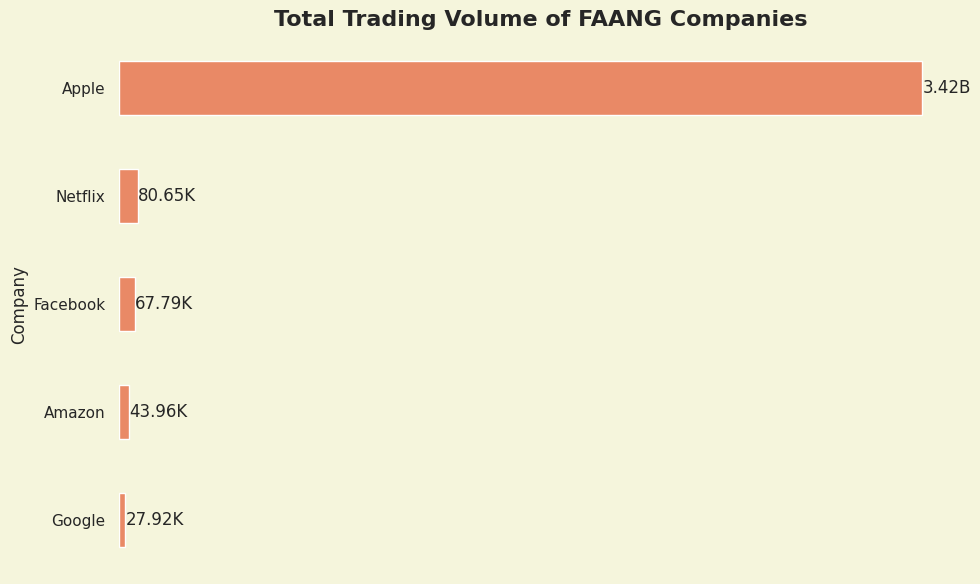

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to format large numbers
def format_large_number(num):
    """Format large numbers for display."""
    for unit in ['T', 'B', 'M', 'K']:
        if abs(num) < 1000.0:
            return f"{num:.2f}{unit}"
        num /= 1000.0
    return f"{num:.2f}B"

# Assuming 'total_volume' is already sorted in descending order by volume traded
total_volume_sorted = total_volume.sort_values(by='Volume', ascending=False)

# Set the style for the plot without gridlines
sns.set(style="whitegrid")

# Create a figure and set the background color to beige
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('beige')  # Set the background color of the figure to beige

# Plotting the total volume traded as horizontal bars
ax = sns.barplot(x=total_volume_sorted['Volume'],  # Volume traded per company
                 y=total_volume_sorted['Company'],
                 ci=None,
                 width=0.5,  # Reduced bar width for a cleaner look
                 color="coral")  # Use a contrasting color for the bars, e.g., orange

# Adding labels and title (making the title bold)
plt.title("Total Trading Volume of FAANG Companies", fontsize=16, fontweight='bold')
plt.xlabel("Total Volume Traded", fontsize=12)
plt.ylabel("Company", fontsize=12)

# Remove the x-axis label and ticks
ax.set(xlabel=None)  # Remove x-axis label
ax.set_xticks([])  # Remove x-axis ticks

# Displaying the volume labels on the bars with formatted numbers
for i in range(len(total_volume_sorted)):
    ax.text(total_volume_sorted['Volume'].iloc[i] + 1,  # Add some space to the right for the label
            i,
            format_large_number(total_volume_sorted["Volume"].iloc[i]),  # Use formatted numbers
            va='center',
            fontsize=12)

# Remove gridlines and make the layout tight
plt.grid(False)  # Disable gridlines

# Set the background color of the plot area (the box) to beige
ax.set_facecolor('beige')

# Remove the plot box (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()  # Ensure no clipping of labels

# Display the plot
plt.show()

In [ ]:
print(total_volume.columns)

Index(['Company', 'Volume'], dtype='object')


In [13]:
import plotly.express as px

# Filter Amazon's data from the loaded dataset
amazon_data = faang_data[faang_data['Company'] == 'Amazon']

# Create a scatter plot to show the correlation between Close price and Volume
fig = px.scatter(
    amazon_data,
    x='Volume',
    y='Close',
    title="Correlation Between Amazon's Stock Price and Trading Volume",
    labels={'Volume': 'Volume Traded', 'Close': 'Stock Price (USD)'},
    template='plotly_white'
)

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title="Volume Traded",
    yaxis_title="Stock Price (USD)",
    font=dict(size=14),
    plot_bgcolor="beige"
)

# Show the plot
fig.show()

In [36]:
import plotly.express as px

# Filter Amazon's data from the loaded dataset
amazon_data = faang_data[faang_data['Company'] == 'Amazon']

# Create a scatter plot to show the correlation between Close price and Volume
fig = px.scatter(
    amazon_data,
    x='Volume',
    y='Close',
    title="Correlation Between Amazon's Stock Price and Trading Volume",
    labels={'Volume': 'Volume Traded', 'Close': 'Stock Price (USD)'},
    template='plotly_white',
    color_discrete_sequence=['coral']  # Set point color to coral
)

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Volume Traded',  # X-axis label
    yaxis_title='Stock Price (USD)',  # Y-axis label
    font=dict(size=14),
    plot_bgcolor="beige",  # Set background color to beige
    paper_bgcolor="beige",  # Set overall chart background to beige
    xaxis=dict(showgrid=False),  # Remove x-axis gridlines
    yaxis=dict(showgrid=False),  # Remove y-axis gridlines
)

# Show the plot
fig.show()

In [37]:
import plotly.express as px

# Filter Apple's data from the loaded dataset
apple_data = faang_data[faang_data['Company'] == 'Apple']

# Create a scatter plot to show the correlation between Close price and Volume
fig = px.scatter(
    apple_data,
    x='Volume',
    y='Close',
    title="Correlation Between Apple's Stock Price and Trading Volume",
    labels={'Volume': 'Volume Traded', 'Close': 'Stock Price (USD)'},
    template='plotly_white',
    color_discrete_sequence=['coral']  # Set point color to coral
)

# Customize the layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Volume Traded',  # X-axis label
    yaxis_title='Stock Price (USD)',  # Y-axis label
    font=dict(size=14),
    plot_bgcolor="beige",  # Set background color to beige
    paper_bgcolor="beige",  # Set overall chart background to beige
    xaxis=dict(showgrid=False),  # Remove x-axis gridlines
    yaxis=dict(showgrid=False),  # Remove y-axis gridlines
)

# Show the plot
fig.show()

In [15]:
import pandas as pd

# Ensure 'Date' is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'], errors='coerce')

# Filter data for 2020
data_2020 = faang_data[(faang_data['Date'].dt.year == 2020)]

# Filter data for Amazon and Google
amazon_data_2020 = data_2020[data_2020['Company'] == 'Amazon']
google_data_2020 = data_2020[data_2020['Company'] == 'Google']

# Calculate total trading volume for 2020 for both companies
amazon_total_volume = amazon_data_2020['Volume'].sum()
google_total_volume = google_data_2020['Volume'].sum()

print(f"Total Trading Volume in 2020:")
print(f"Amazon: {amazon_total_volume:,} shares")
print(f"Google: {google_total_volume:,} shares")

Total Trading Volume in 2020:
Amazon: 801,323,400.0 shares
Google: 368,416,433.0 shares


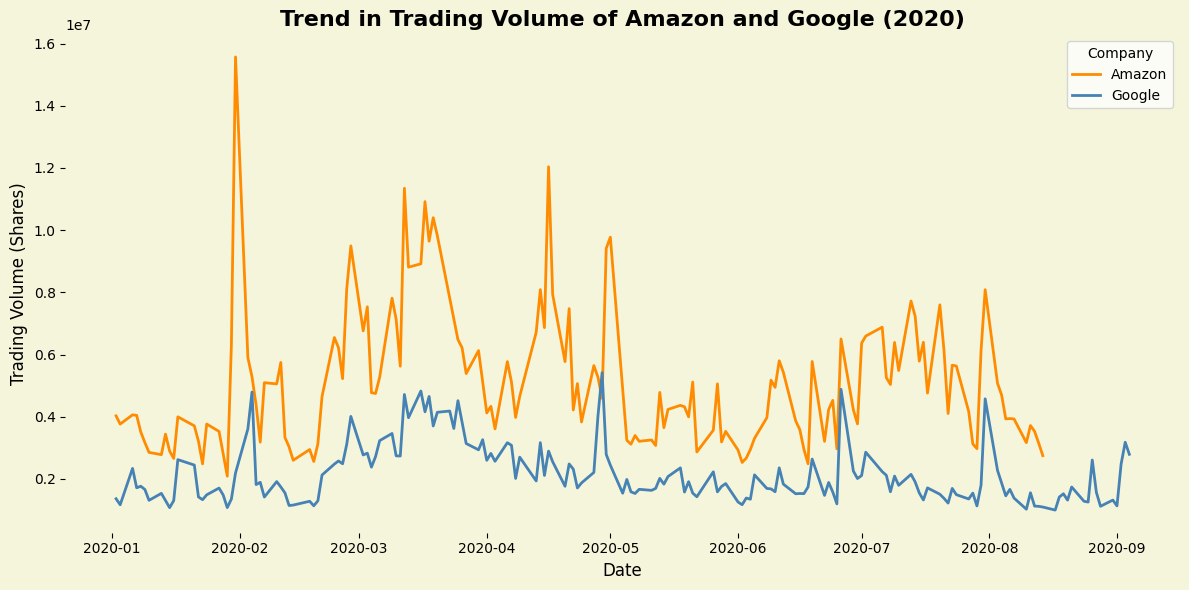

In [23]:
import matplotlib.pyplot as plt

# Filter data for Amazon and Google in 2020
amazon_data_2020 = data_2020[data_2020['Company'] == 'Amazon']
google_data_2020 = data_2020[data_2020['Company'] == 'Google']

# Group data by date to calculate daily trading volume
amazon_volume = amazon_data_2020.groupby('Date')['Volume'].sum()
google_volume = google_data_2020.groupby('Date')['Volume'].sum()

# Create the plot
plt.figure(figsize=(12, 6))

# Amazon trend
plt.plot(amazon_volume.index, amazon_volume.values, label='Amazon', color='#FF8C00', linewidth=2)  # Dark orange

# Google trend
plt.plot(google_volume.index, google_volume.values, label='Google', color='#4682B4', linewidth=2)  # Steel blue

# Customization for beige theme
plt.gcf().set_facecolor('beige')  # Set the entire figure background to beige
plt.gca().set_facecolor('beige')  # Set the plot area background to beige
plt.title("Trend in Trading Volume of Amazon and Google (2020)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trading Volume (Shares)", fontsize=12)
plt.legend(title="Company", fontsize=10)
plt.grid(False)  # Remove gridlines

# Remove spines for a cleaner look
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

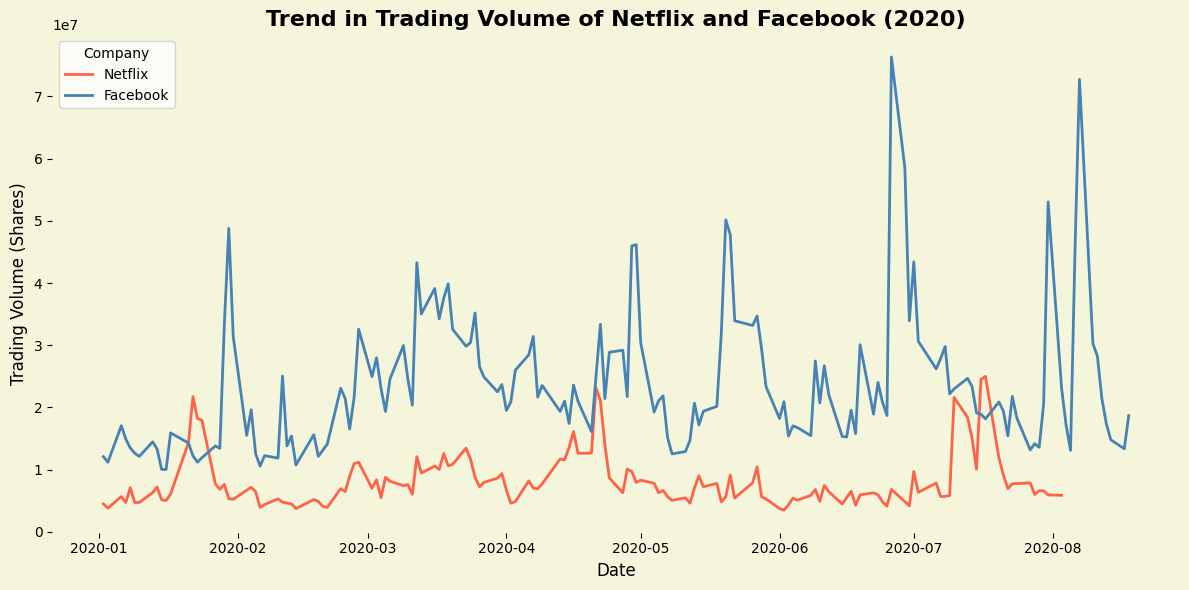

In [21]:
import matplotlib.pyplot as plt

# Filter data for Netflix and Facebook in 2020
netflix_data_2020 = data_2020[data_2020['Company'] == 'Netflix']
facebook_data_2020 = data_2020[data_2020['Company'] == 'Facebook']

# Group data by date to calculate daily trading volume
netflix_volume = netflix_data_2020.groupby('Date')['Volume'].sum()
facebook_volume = facebook_data_2020.groupby('Date')['Volume'].sum()

# Create the plot
plt.figure(figsize=(12, 6))

# Netflix trend
plt.plot(netflix_volume.index, netflix_volume.values, label='Netflix', color='#FF6347', linewidth=2)  # Tomato color

# Facebook trend
plt.plot(facebook_volume.index, facebook_volume.values, label='Facebook', color='#4682B4', linewidth=2)  # Steel blue color

# Customization for beige theme
plt.gcf().set_facecolor('beige')  # Set the entire figure background to beige
plt.gca().set_facecolor('beige')  # Set the plot area background to beige
plt.title("Trend in Trading Volume of Netflix and Facebook (2020)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trading Volume (Shares)", fontsize=12)
plt.legend(title="Company", fontsize=10)
plt.grid(False)  # Remove gridlines

# Remove spines for a cleaner look
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

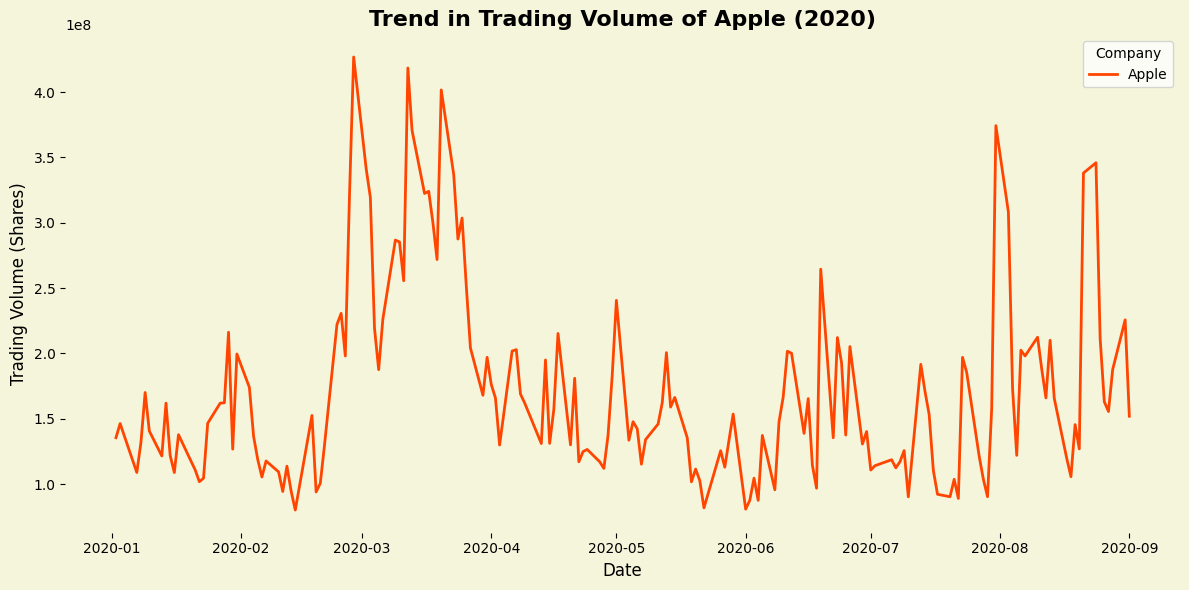

In [30]:
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'], errors='coerce')

# Filter data for 2020
apple_data_2020 = faang_data[(faang_data['Date'].dt.year == 2020) & (faang_data['Company'] == 'Apple')]

# Group data by date to calculate daily trading volume for Apple
apple_volume = apple_data_2020.groupby('Date')['Volume'].sum()

# Create the plot
plt.figure(figsize=(12, 6))

# Apple trend
plt.plot(apple_volume.index, apple_volume.values, label='Apple', color='#FF4500', linewidth=2)  # Red-orange

# Customization for beige theme
plt.gcf().set_facecolor('beige')  # Set the entire figure background to beige
plt.gca().set_facecolor('beige')  # Set the plot area background to beige
plt.title("Trend in Trading Volume of Apple (2020)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trading Volume (Shares)", fontsize=12)
plt.legend(title="Company", fontsize=10)

# # Show gridlines for x and y axis
# plt.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=0.5)

# # Show the lines for x and y axis
# plt.axhline(0, color='black',linewidth=1)  # x-axis line
# plt.axvline(0, color='black',linewidth=1)  # y-axis line

# Remove spines for a cleaner look, keeping the axis lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

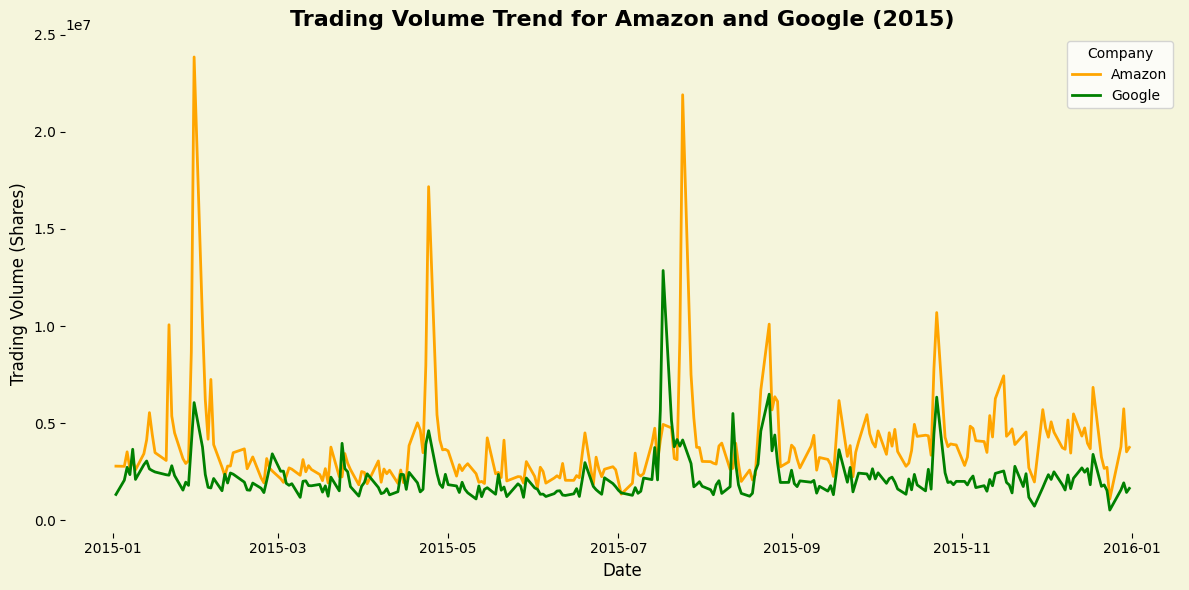

In [32]:
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'], errors='coerce')

# Filter data for 2015 and for Amazon and Google
data_2015 = faang_data[(faang_data['Date'].dt.year == 2015) & (faang_data['Company'].isin(['Amazon', 'Google']))]

# Group data by date and company, and calculate daily trading volume
volume_2015 = data_2015.groupby(['Date', 'Company'])['Volume'].sum().unstack()

# Plotting the trend for Amazon and Google
plt.figure(figsize=(12, 6))

# Plot for Amazon and Google
plt.plot(volume_2015.index, volume_2015['Amazon'], label='Amazon', color='orange', linewidth=2)
plt.plot(volume_2015.index, volume_2015['Google'], label='Google', color='green', linewidth=2)

# Customization for beige theme
plt.gcf().set_facecolor('beige')  # Set the entire figure background to beige
plt.gca().set_facecolor('beige')  # Set the plot area background to beige
plt.title("Trading Volume Trend for Amazon and Google (2015)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trading Volume (Shares)", fontsize=12)
plt.legend(title="Company", fontsize=10)

# # Show gridlines for x and y axis
# plt.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=0.5)

# # Show the lines for x and y axis
# plt.axhline(0, color='black',linewidth=1)  # x-axis line
# plt.axvline(0, color='black',linewidth=1)  # y-axis line

# Remove spines for a cleaner look, keeping the axis lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

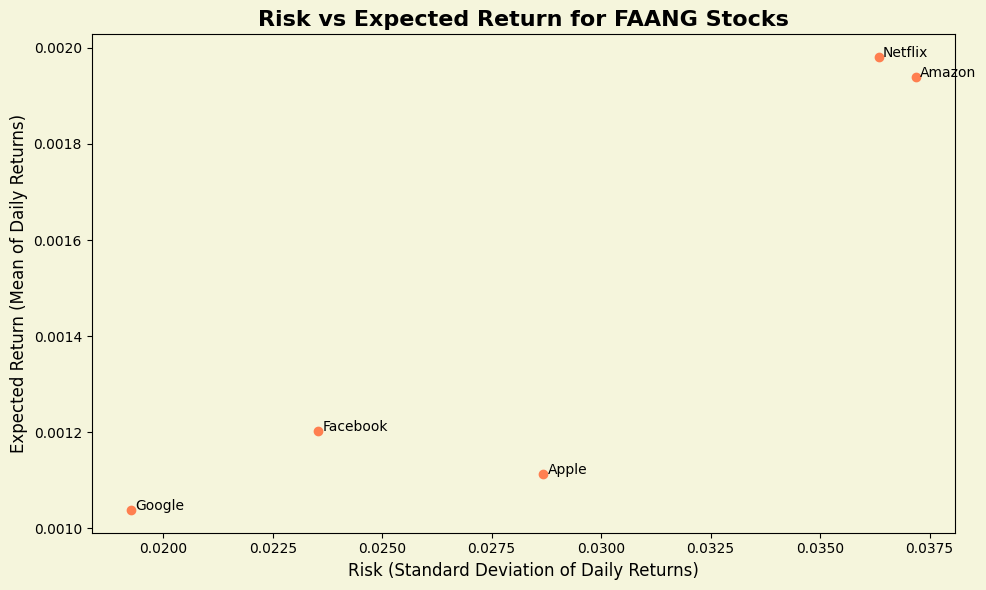

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'], errors='coerce')

# Calculate daily returns for each company
faang_data['Daily Return'] = faang_data.groupby('Company')['Close'].pct_change()

# Calculate the expected return (mean of daily returns) and risk (standard deviation of daily returns) for each company
risk_return = faang_data.groupby('Company').agg(
    Expected_Return=('Daily Return', 'mean'),
    Risk=('Daily Return', 'std')
)

# Plotting Risk vs Expected Return
plt.figure(figsize=(10, 6))

# Scatter plot of Risk vs Expected Return
plt.scatter(risk_return['Risk'], risk_return['Expected_Return'], color='coral')

# Add labels to each point
for company in risk_return.index:
    plt.text(risk_return.loc[company, 'Risk'] + 0.0001, risk_return.loc[company, 'Expected_Return'], company)

# Add titles and labels
plt.title("Risk vs Expected Return for FAANG Stocks", fontsize=16, fontweight='bold')
plt.xlabel("Risk (Standard Deviation of Daily Returns)", fontsize=12)
plt.ylabel("Expected Return (Mean of Daily Returns)", fontsize=12)

# Set the background color to beige
plt.gcf().set_facecolor('beige')
plt.gca().set_facecolor('beige')

# Show gridlines
# plt.grid(False, which='both', axis='both', color='gray', linestyle='-', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()